In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Merge 12 Months Sales Data Into A Single csv File

In [2]:
# List all files in the directory
files = [file for file in os.listdir(r'C:\Users\omara\OneDrive\Desktop\Omar\Portfolio\Python\SalesAnalysis\Sales_Data')]

all_months_data = pd.DataFrame()

# Loop through and read each file
for file in files:
    df = pd.read_csv(r'C:\Users\omara\OneDrive\Desktop\Omar\Portfolio\Python\SalesAnalysis\Sales_Data\\' + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_months_data',index = False)

In [3]:
all_data = pd.read_csv(r"C:\Users\omara\OneDrive\Desktop\Omar\Portfolio\Python\SalesAnalysis\all_months_data.csv")

### Add Months Columns

In [4]:
#Add Months Column
all_data['Months'] = 3
all_data['Months'] = all_data['Order Date'].str.split('/').str[0]

Drop Blank Rows, Order Date Values That Are = Order Date & Convert Months Column To Number

In [5]:
all_data = all_data.dropna()
all_data = all_data[all_data['Order Date'] != 'Order Date']
all_data['Months'] = all_data['Months'].astype(int)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


### Add Sales Column

Convert Quantity Ordered & Price Each Columns To int32 & float 

In [6]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### What Was The Best Month For Sales ? How Much Was Earned That Month ?

In [7]:
sum_all_months = all_data.groupby('Months').sum()['Sales']
sum_all_months.sort_values(ascending=False).head(1)

Months
12    4613443.34
Name: Sales, dtype: float64

-------------------------------------------------------------------------------------------------------------------------

### Visualize Sales By Months

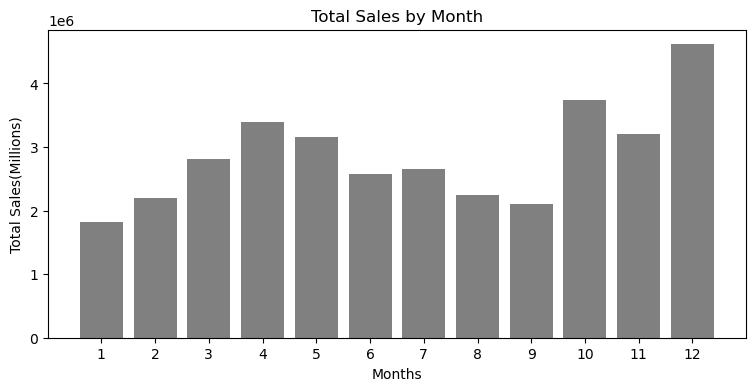

In [8]:
plt.figure(figsize=(9, 4))  # Adjust figure size if needed
plt.bar(sum_all_months.index, sum_all_months.values, color='grey')
plt.xlabel('Months')
plt.ylabel('Total Sales(Millions)')
plt.title('Total Sales by Month')
plt.xticks(sum_all_months.index)  # Set x-axis ticks to match months
plt.show()

-

#### Which City Has The Highest Number Of Sales ?

In [9]:
all_data['City'] = 'h'
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


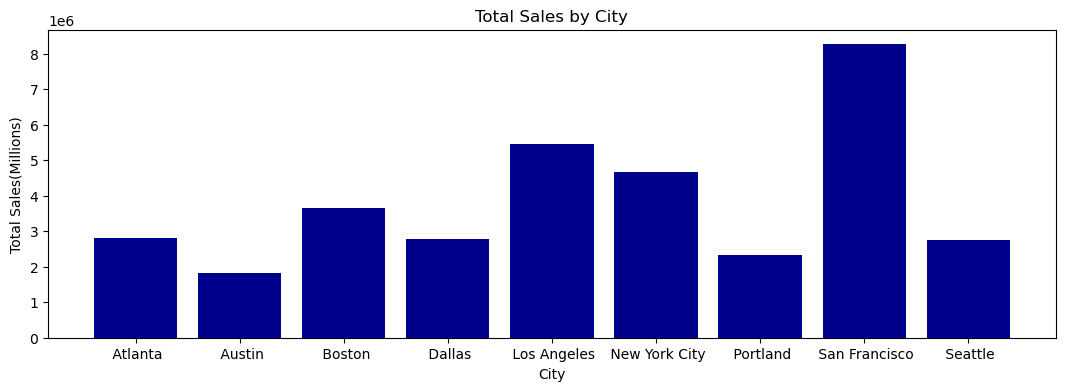

In [10]:
sum_all_city = all_data.groupby('City').sum()['Sales']

plt.figure(figsize=(13, 4))  # Adjust figure size if needed
plt.bar(sum_all_city.index, sum_all_city.values, color='darkblue')
plt.xlabel('City')
plt.ylabel('Total Sales(Millions)')
plt.title('Total Sales by City')
plt.xticks(sum_all_city.index)
plt.show()

-

### Add Column Street Using lambda Function

In [11]:
def get_street(street):
    return street.split(',')[0]

all_data['Street'] = all_data['Purchase Address'].apply(lambda x: get_street(x))

In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Street
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,917 1st St
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,682 Chestnut St
3,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,669 Spruce St
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,669 Spruce St
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,333 8th St


-

## What Time Should We Display Ads To Maximize Sales Of Products ?

Convert Order Date to DateTime format and then extract Hours and minutes

In [13]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute


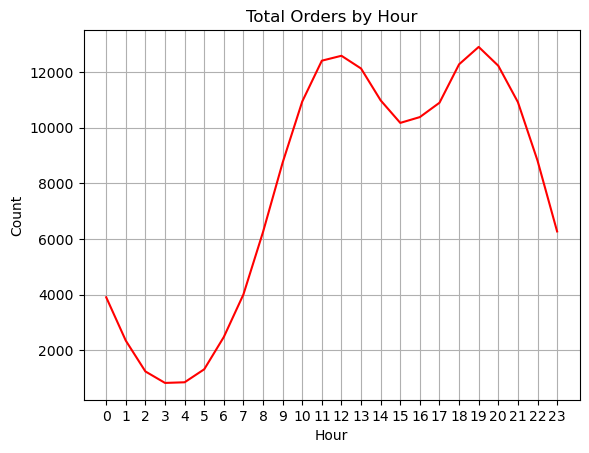

In [74]:
hours = [hour for hour, df in all_data.groupby('Hour')]

hourly_counts = all_data.groupby('Hour').size()

plt.plot(hours, hourly_counts, color='red')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Total Orders by Hour')
plt.xticks(hours)
plt.grid()
plt.show()

#Recommended to advertise at 11am or 7pm (19)

-


### What Products Are Often Sold Together ?

Show Top 5 Sold Combined Products

In [47]:
df = all_data[all_data['Order ID'].duplicated(keep = False)].copy()
df['Combined Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.groupby('Combined Products').size().sort_values(ascending = False).head(5)

Combined Products
iPhone,Lightning Charging Cable         1764
Google Phone,USB-C Charging Cable       1712
iPhone,Wired Headphones                  722
Vareebadd Phone,USB-C Charging Cable     624
Google Phone,Wired Headphones            606
dtype: int64

-

## What Are The Most Sold Products ?

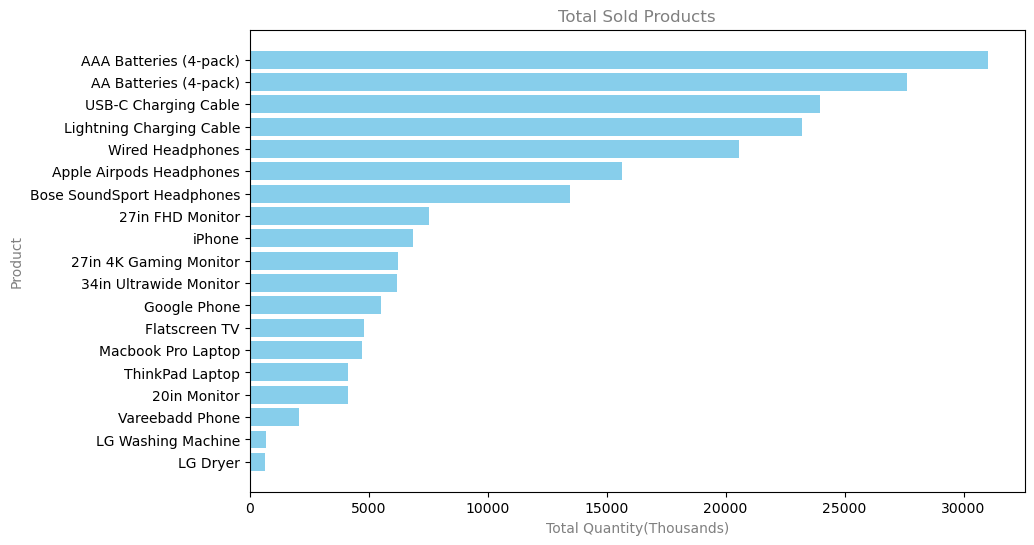

In [72]:
products = all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.barh(products.index, products.values, color='skyblue')
plt.xlabel('Total Quantity(Thousands)', color= 'grey')
plt.ylabel('Product', color= 'grey')
plt.title('Total Sold Products', color= 'grey')
plt.yticks(products.index)
plt.show()